# SOHO/EIT

In [ ]:
ds_path = "./data/soho/eit"

start_date = "2007-12-13"
end_date = "2007-12-14"

In [ ]:
from datetime import datetime, timedelta

t_start = datetime.strptime(start_date, "%Y-%m-%d")
t_end = datetime.strptime(end_date, "%Y-%m-%d")
td = timedelta(hours=12)
date_list = [t_start + i * td for i in range((t_end - t_start) // td)]
date_list

[datetime.datetime(2007, 12, 13, 0, 0), datetime.datetime(2007, 12, 13, 12, 0)]

In [ ]:
from itipy.download.download_soho_eit import SOHOEITDownloader

downloader = SOHOEITDownloader(ds_path=ds_path)

In [ ]:
for d in date_list:
    downloader.downloadDate(d)

2025-02-14 07:29:35,774 - SOHOEITDownloader - INFO - Start download: 2007-12-13T00:00:00
304: 100%|██████████| 4.02M/4.02M [00:02<00:00, 1.46MB/s]
171: 100%|██████████| 4.02M/4.02M [00:03<00:00, 1.15MB/s]
284: 100%|██████████| 4.02M/4.02M [00:03<00:00, 1.14MB/s]
195: 100%|██████████| 4.02M/4.02M [00:04<00:00, 928kB/s] 
2025-02-14 07:29:41,418 - SOHOEITDownloader - INFO - Finished: 2007-12-13T00:00:00
2025-02-14 07:29:41,419 - SOHOEITDownloader - INFO - Start download: 2007-12-13T12:00:00
304: 100%|██████████| 4.02M/4.02M [00:02<00:00, 1.47MB/s]
195: 100%|██████████| 4.02M/4.02M [00:03<00:00, 1.11MB/s]
284: 100%|██████████| 4.02M/4.02M [00:04<00:00, 994kB/s] 
171: 100%|██████████| 4.02M/4.02M [00:04<00:00, 915kB/s] 
2025-02-14 07:29:47,095 - SOHOEITDownloader - INFO - Finished: 2007-12-13T12:00:00


For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]
2025-02-14 07:29:47,971 - sunpy - WARNING - SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs



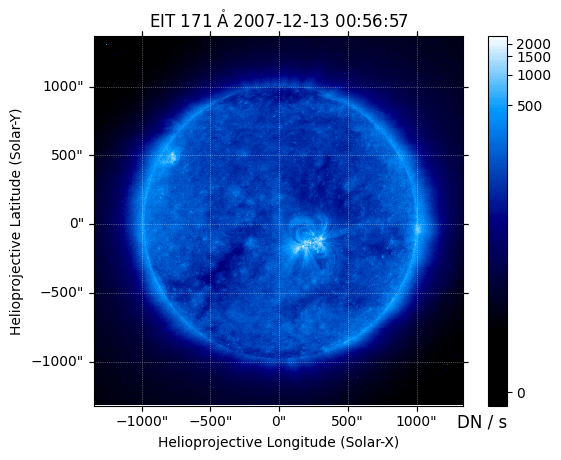

For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]
2025-02-14 07:29:48,324 - sunpy - WARNING - SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs



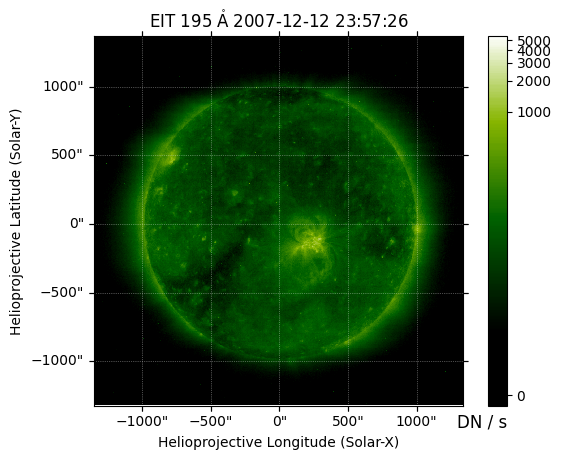

For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]
2025-02-14 07:29:48,572 - sunpy - WARNING - SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs



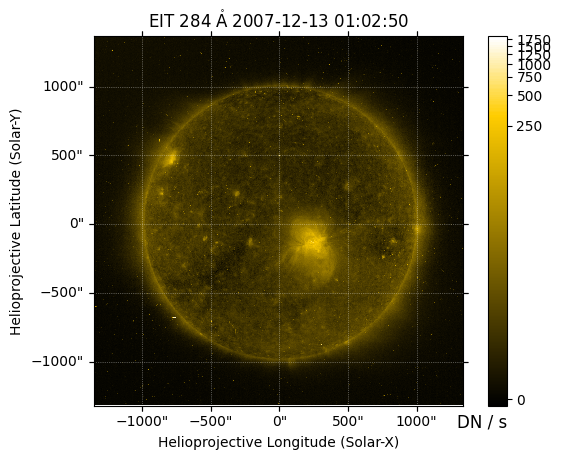

For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]
2025-02-14 07:29:48,840 - sunpy - WARNING - SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliocentricmeanecliptic' the following metadata is missing: hec_x,hec_z,hec_y
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs



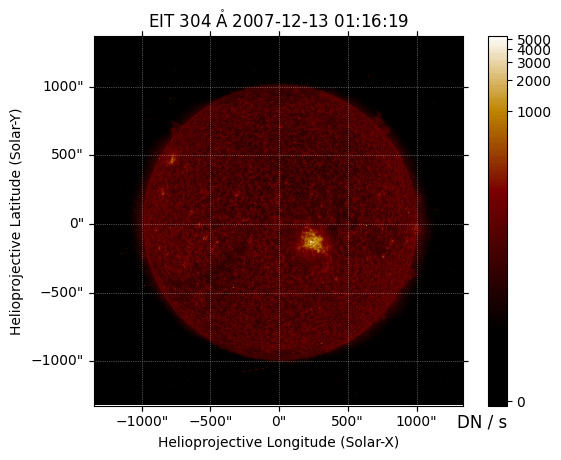

In [ ]:
from pathlib import Path
from sunpy.map import Map
from astropy.io import fits
from astropy.visualization import ImageNormalize, AsinhStretch

dl = Path(ds_path)

for wl in downloader.wavelengths:
    file = sorted((dl / str(wl)).glob("*.fits"))[0]
    hdr = fits.getheader(file)
    hdr["OBSRVTRY"] = 'SOHO'
    hdr["TELESCOP"] = 'SOHO'
    hdr["INSTRUME"] = 'EIT'
    smap = Map(fits.getdata(file), hdr)
    smap.plot_settings['norm'] = ImageNormalize(stretch=AsinhStretch(0.0005))
    smap.peek()